<h1> Polynomial Linear Regression</h1>


<h4> Why is it still called Linear Regression when its polynomial? </h4>

Even though the relationship between x and y is non-linear, the function can still be expressed as a linear combination of coefficients. So the term linear or non-linear in this case refers to the coefficients.


![title](https://www.researchgate.net/profile/Manish_Kukreja/publication/320609829/figure/fig2/AS:631627428413442@1527603122071/Part-a-Represents-linear-regression-on-a-one-dimensional-data-17-Part-b.png)

<h2> Data Preprocessing</h2>

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# set working directory
os.chdir("C:/Users/work/Documents/Training/Udemy/MachineLearning A-Z/original/Machine Learning A-Z New/Part 2 - Regression/Section 6 - Polynomial Regression")

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# The dataset is only 10 samples, and we need a very accurate model to estimate the salary of a level 6.5 employee. THerefore we will use 100% of the data for training and not split the dataset into test and training data

# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling not necessary in most cases as packages do it for you
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)'

<h3> Fitting Polynomial Regression to dataset </h3>
<p> We will fir a linear Regression and a Polynomial Regression in order to compare the both</p>

In [5]:
#fit linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# repeat for degrees of freedom = 3
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_reg_3.fit_transform(X)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3> Visualize the Results</h3>

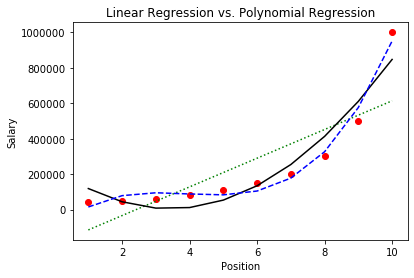

In [38]:
# predict data
pred_lin = lin_reg.predict(X)
pred_poly = lin_reg_2.predict(poly_reg.fit_transform(X))
pred_poly_3 = lin_reg_3.predict(poly_reg_3.fit_transform(X))

# plot results
# true values
plt.scatter(X,y, color ='red')
# linear regression
plt.plot(X, pred_lin, color = 'green', linestyle=':')
# polynomial regression
plt.plot(X, pred_poly, color = 'black')
# polynomial regression deg of freedom = 3
plt.plot(X, pred_poly_3, color = 'blue', linestyle= "--")
plt.title("Linear Regression vs. Polynomial Regression")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

<h3> Add additional X values for continuous representation</h3>

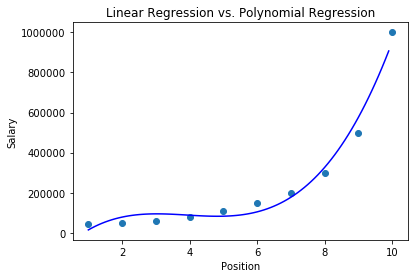

In [44]:
# create new X array with 0.1 steps
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# predict new values
pred_poly_grid = lin_reg_3.predict(poly_reg_3.fit_transform(X_grid))

plt.scatter(X, y)
plt.plot(X_grid, pred_poly_grid, color = 'blue', linestyle= "-")
plt.title("Linear Regression vs. Polynomial Regression")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

<h3> Use Model to predict Salary for new Employee </h3>
<p>The new employee say he was a level 6.5 at his old company, where he earned $160.000. Lets use the Model to see if that is true </p>

In [52]:
# use linear Model to check value
lin_salary = lin_reg.predict([[6.5]])
print("Salary based on linear Regression: $", round(lin_salary[0],2))

# use polynomial regression model with dof=2
poly_salary = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Salary based on linear Regression: $", round(poly_salary[0],2))

# use polynomial regression model with dof=3
poly_salary_3 = lin_reg_3.predict(poly_reg_3.fit_transform([[6.5]]))
print("Salary based on linear Regression: $", round(poly_salary_3[0],2))

Salary based on linear Regression: $ 330378.79
Salary based on linear Regression: $ 189498.11
Salary based on linear Regression: $ 133259.47
